# Wolff 알고리즘

여러 상태가 있는 격자의 각 스핀은 일정한 베타와 접촉할 때마다 확률적으로 변경된다.

beta:  0.1 , avg_spin: 0.20536
beta:  0.2 , avg_spin: 0.27359
beta:  0.3 , avg_spin: 0.43939
beta:  0.4 , avg_spin: 0.72167
beta:  0.5 , avg_spin: 0.91733
beta:  0.6 , avg_spin: 0.97313
beta:  0.7 , avg_spin: 0.98945
beta:  0.8 , avg_spin: 0.99578
beta:  0.9 , avg_spin: 0.9983
beta:  1.0 , avg_spin: 0.99894


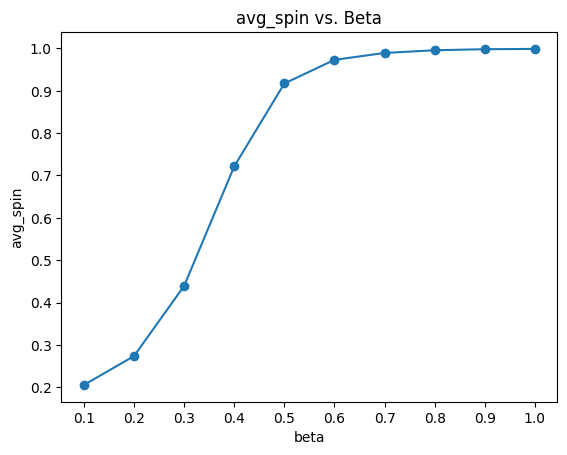

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L = 5
N = L * L
XNN = 1  # x 방향의 최근접 이웃
YNN = L  # y 방향의 최근접 이웃

def update(s, beta):
    padd = 1 - np.exp(-2 * beta)

    i = np.random.randint(N)
    stack = [i]
    oldspin = s[i]
    newspin = -s[i]
    s[i] = newspin

    while stack:
        current = stack.pop()

        nn = current + XNN # 오른쪽 이웃
        if nn >= N:
            nn -= N
        if s[nn] == oldspin and np.random.rand() < padd:
            stack.append(nn)
            s[nn] = newspin

        nn = current - XNN # 왼쪽 이웃
        if nn < 0:
            nn += N
        if s[nn] == oldspin and np.random.rand() < padd:
            stack.append(nn)
            s[nn] = newspin

        nn = current + YNN # 위쪽 이웃
        if nn >= N:
            nn -= N
        if s[nn] == oldspin and np.random.rand() < padd:
            stack.append(nn)
            s[nn] = newspin

        nn = current - YNN # 아래쪽 이웃
        if nn < 0:
            nn += N
        if s[nn] == oldspin and np.random.rand() < padd:
            stack.append(nn)
            s[nn] = newspin

betas = np.linspace(0.1, 1.0, 10)
avg_spin = []

# 각 beta 값에 대해 스핀 평균값의 절대값 계산
for beta in betas:
    m = 0
    s = np.random.choice([-1, 1], size=N)
    for _ in range(10000):
        update(s, beta)
        m += np.abs(np.mean(s))
    avg_spin.append(m/10000)
    # print(f"beta: {beta:.1f}, avg_spin: {m:.4f}")
    print("beta: ",round(beta,2), ", avg_spin:", round(m/10000,5))

plt.plot(betas, avg_spin, marker='o')
plt.xlabel('beta')
plt.xticks(betas)
plt.ylabel('avg_spin')
plt.title('avg_spin vs. Beta')
plt.show()